In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

covid_data = "Resources/CovidNumbers.csv"
March_2019_turnstile = "Resources/Turnstile_190330.csv"
March_2020_turnstile = "Resources/Turnstile_200328.csv"
June_2019_turnstile = "Resources/Turnstile_190629.csv"
June_2020_turnstile = "Resources/Turnstile_200627.csv"

In [2]:
#data-by-modzcta.csv
#This file contains data by modified ZIP code tabulation areas (ZCTA). 
#This unit of geography is similar to ZIP codes but combines census blocks with smaller populations to allow more stable estimates of population size for rate calculation. 
#Please see description of modified ZCTAs in the technical notes section (Geography: Zip codes and ZCTAs).
#data as of 9/25/20

covid_pd = pd.read_csv(covid_data, header = 8)

covid_pd.head()

,\outl0\strokewidth0 \strokec2 MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS\
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,459.0,1947.97,23563.03,27.0,114.59,5.53,8299\
1,10002,Chinatown/Lower East Side,Manhattan,1371.0,1786.19,76755.41,161.0,209.76,6.61,20729\
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,584.0,1085.47,53801.62,35.0,65.05,3.07,19041\
3,10004,Financial District,Manhattan,45.0,1232.67,3650.61,1.0,27.39,4.43,1015\
4,10005,Financial District,Manhattan,109.0,1298.22,8396.11,2.0,23.82,4.24,2569\


In [3]:
#rename the column
covid_clean_df = covid_pd.rename(columns = {"\outl0\strokewidth0 \strokec2 MODIFIED_ZCTA": "Modified_ZCTA"})
covid_clean_df.head()

,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS\
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,459.0,1947.97,23563.03,27.0,114.59,5.53,8299\
1,10002,Chinatown/Lower East Side,Manhattan,1371.0,1786.19,76755.41,161.0,209.76,6.61,20729\
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,584.0,1085.47,53801.62,35.0,65.05,3.07,19041\
3,10004,Financial District,Manhattan,45.0,1232.67,3650.61,1.0,27.39,4.43,1015\
4,10005,Financial District,Manhattan,109.0,1298.22,8396.11,2.0,23.82,4.24,2569\


In [4]:
#covid case rate
columns_to_extract = ["Modified_ZCTA", "NEIGHBORHOOD_NAME", "BOROUGH_GROUP", "COVID_CASE_RATE"]
covid_case_rate = pd.DataFrame(covid_clean_df, columns = columns_to_extract)

covid_case_rate.shape

(178, 4)

In [5]:
covid_case_rate.head()

,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_RATE
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,1947.97
1,10002,Chinatown/Lower East Side,Manhattan,1786.19
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,1085.47
3,10004,Financial District,Manhattan,1232.67
4,10005,Financial District,Manhattan,1298.22


In [6]:
covid_case_rate = covid_case_rate.sort_values(by=["COVID_CASE_RATE"], ascending = False)

covid_case_rate.head()

,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_RATE
140,11369,Airport/East Elmhurst,Queens,4837.88
125,11239,East New York,Brooklyn,4688.49
139,11368,Corona/North Corona,Queens,4627.48
74,10469,Allerton/Baychester/Pelham Gardens/Williamsbridge,Bronx,4602.27
142,11372,Jackson Heights,Queens,4561.81


In [7]:
covid_case_max = covid_case_rate.nlargest(4, "COVID_CASE_RATE")

print(covid_case_max.shape)

covid_case_max.head()

(4, 4)


,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_RATE
140,11369,Airport/East Elmhurst,Queens,4837.88
125,11239,East New York,Brooklyn,4688.49
139,11368,Corona/North Corona,Queens,4627.48
74,10469,Allerton/Baychester/Pelham Gardens/Williamsbridge,Bronx,4602.27


In [8]:
covid_case_min = covid_case_rate.nsmallest(4, "COVID_CASE_RATE")
print(covid_case_min.shape)

covid_case_min.head()

(4, 4)


,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_RATE
42,10280,Battery Park City,Manhattan,675.77
6,10007,TriBeCa,Manhattan,933.36
10,10012,Greenwich Village/SoHo,Manhattan,1000.78
102,11215,Gowanus/Park Slope/Windsor Terrace,Brooklyn,1042.44


In [9]:
march_2019_data = pd.read_csv(March_2019_turnstile, header = 9)
march_2019_data.head()

,\outl0\strokewidth0 \strokec2 C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,0:00:00,REGULAR,6989774.0,2370411.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,4:00:00,REGULAR,6989795.0,2370413.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,8:00:00,REGULAR,6989813.0,2370436.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,12:00:00,REGULAR,6989924.0,2370512.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,16:00:00,REGULAR,6990200.0,2370573.0


In [10]:
march_2020_data = pd.read_csv(March_2020_turnstile, header = 9)
march_2020_data.head()

,\outl0\strokewidth0 \strokec2 C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,0:00:00,REGULAR,7411940.0,2515962.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,4:00:00,REGULAR,7411942.0,2515966.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,8:00:00,REGULAR,7411945.0,2515979.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,12:00:00,REGULAR,7411969.0,2516000.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,16:00:00,REGULAR,7412028.0,2516024.0


In [11]:
march_2019_data.columns
mar_2019 = march_2019_data.columns[-1]
march_2019_data = march_2019_data.rename(columns = {mar_2019: "EXIT"})
columns_to_use = ['SCP', 'STATION','LINENAME', 'DATE', 'TIME', 'DESC', 'ENTRIES','EXIT']
march_2019_df = pd.DataFrame(march_2019_data, columns = columns_to_use)

march_2019_df.head()

,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXIT
0,02-00-00,59 ST,NQR456W,3/23/19,0:00:00,REGULAR,6989774.0,2370411.0
1,02-00-00,59 ST,NQR456W,3/23/19,4:00:00,REGULAR,6989795.0,2370413.0
2,02-00-00,59 ST,NQR456W,3/23/19,8:00:00,REGULAR,6989813.0,2370436.0
3,02-00-00,59 ST,NQR456W,3/23/19,12:00:00,REGULAR,6989924.0,2370512.0
4,02-00-00,59 ST,NQR456W,3/23/19,16:00:00,REGULAR,6990200.0,2370573.0


In [12]:
newdf_2019 = march_2019_df.loc[(march_2019_df["STATION"] == "E 180 ST") | 
                          (march_2019_df["STATION"] == "86 ST") | 
                          (march_2019_df["STATION"] == "96 ST") | 
                          (march_2019_df["STATION"] == "CHAMBERS ST") |
                             (march_2019_df["STATION"] == "ATL AV-BARCLAY") |
                             (march_2019_df["STATION"] == "W 4 ST-WASH SQ") |
                              (march_2019_df["STATION"] == "BROADWAY JCT") |
                               (march_2019_df["STATION"] == "JKSN HT-ROOSVLT") |
                                (march_2019_df["STATION"] == "WORLD TRADE CTR") |
                                 (march_2019_df["STATION"] == "QUEENSBORO PLZ")]
newdf_2019

,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXIT
11917,01-00-00,CHAMBERS ST,JZ456,3/23/19,0:00:00,REGULAR,3254414.0,14654587.0
11918,01-00-00,CHAMBERS ST,JZ456,3/23/19,4:00:00,REGULAR,3254420.0,14654606.0
11919,01-00-00,CHAMBERS ST,JZ456,3/23/19,8:00:00,REGULAR,3254421.0,14654655.0
11920,01-00-00,CHAMBERS ST,JZ456,3/23/19,12:00:00,REGULAR,3254433.0,14654838.0
11921,01-00-00,CHAMBERS ST,JZ456,3/23/19,16:00:00,REGULAR,3254473.0,14655072.0
...,...,...,...,...,...,...,...,...
196346,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/29/19,9:47:43,REGULAR,117440512.0,162.0
196347,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/29/19,11:00:32,REGULAR,117440512.0,162.0
196348,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/29/19,12:00:00,REGULAR,117440512.0,162.0
196349,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/29/19,16:00:00,REGULAR,117440512.0,162.0


In [13]:
march_2020_data.columns
mar_2020 = march_2020_data.columns[-1]
march_2020_data = march_2020_data.rename(columns = {mar_2020: "EXIT"})
columns_to_use = ['SCP', 'STATION','LINENAME', 'DATE', 'TIME', 'DESC', 'ENTRIES','EXIT']
march_2020_df = pd.DataFrame(march_2020_data, columns = columns_to_use)

march_2020_df.head()

,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXIT
0,02-00-00,59 ST,NQR456W,3/21/20,0:00:00,REGULAR,7411940.0,2515962.0
1,02-00-00,59 ST,NQR456W,3/21/20,4:00:00,REGULAR,7411942.0,2515966.0
2,02-00-00,59 ST,NQR456W,3/21/20,8:00:00,REGULAR,7411945.0,2515979.0
3,02-00-00,59 ST,NQR456W,3/21/20,12:00:00,REGULAR,7411969.0,2516000.0
4,02-00-00,59 ST,NQR456W,3/21/20,16:00:00,REGULAR,7412028.0,2516024.0


In [14]:
newdf_2020 = march_2020_df.loc[(march_2020_df["STATION"] == "E 180 ST") | 
                          (march_2020_df["STATION"] == "86 ST") | 
                          (march_2020_df["STATION"] == "96 ST") | 
                          (march_2020_df["STATION"] == "CHAMBERS ST") |
                             (march_2020_df["STATION"] == "ATL AV-BARCLAY") |
                             (march_2020_df["STATION"] == "W 4 ST-WASH SQ") |
                              (march_2020_df["STATION"] == "BROADWAY JCT") |
                               (march_2020_df["STATION"] == "JKSN HT-ROOSVLT") |
                                (march_2020_df["STATION"] == "WORLD TRADE CTR") |
                                 (march_2020_df["STATION"] == "QUEENSBORO PLZ")]
newdf_2020


,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXIT
11686,01-00-00,CHAMBERS ST,JZ456,3/21/20,0:00:00,REGULAR,137711.0,790628.0
11687,01-00-00,CHAMBERS ST,JZ456,3/21/20,4:00:00,REGULAR,137717.0,790647.0
11688,01-00-00,CHAMBERS ST,JZ456,3/21/20,8:00:00,REGULAR,137724.0,790689.0
11689,01-00-00,CHAMBERS ST,JZ456,3/21/20,12:00:00,REGULAR,137734.0,790794.0
11690,01-00-00,CHAMBERS ST,JZ456,3/21/20,16:00:00,REGULAR,137753.0,790895.0
...,...,...,...,...,...,...,...,...
197531,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/27/20,4:00:00,REGULAR,117440512.0,192.0
197532,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/27/20,8:00:00,REGULAR,117440512.0,192.0
197533,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/27/20,12:00:00,REGULAR,117440512.0,192.0
197534,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/27/20,16:00:00,REGULAR,117440512.0,192.0


In [15]:
march_2019_max = newdf_2019.groupby(["STATION", "LINENAME","SCP"]).max()

march_2019_max

DATE     TIME     DESC     ENTRIES  \
STATION         LINENAME SCP                                               
86 ST           1        00-00-00  3/29/19  9:00:00  REGULAR    722244.0   
                         00-00-01  3/29/19  9:00:00  REGULAR   7142690.0   
                         00-03-00  3/29/19  9:00:00  REGULAR   2555646.0   
                         00-03-01  3/29/19  9:00:00  REGULAR  10088773.0   
                         00-03-02  3/29/19  9:00:00  REGULAR   4368800.0   
...                                    ...      ...      ...         ...   
WORLD TRADE CTR ACE23    1/5/01    3/29/19  8:00:00  REGULAR         0.0   
                         1/6/00    3/25/19  8:00:00  REGULAR    261000.0   
                         1/6/01    3/29/19  8:00:00  REGULAR    100900.0   
                         1/6/02    3/29/19  8:00:00  REGULAR    604961.0   
                         1/6/03    3/29/19  8:00:00  REGULAR    140171.0   

                                        EXIT  
STATION         LINENAME SCP                  
86 ST           1        00-00-00  1142952.0  
                         00-00-01  4216505.0  
                         00-03-00  1418226.0  
                         00-03-01  3001476.0  
                         00-03-02  1269499.0  
...                                      ...  
WORLD TRADE CTR ACE23    1/5/01        694.0  
                         1/6/00      60649.0  
                         1/6/01      22901.0  
                         1/6/02     159598.0  
                         1/6/03      67081.0  

[278 rows x 5 columns]

In [16]:
march_2020_max = newdf_2020.groupby(["STATION", "LINENAME", "SCP"]).max()

march_2020_max

DATE     TIME     DESC     ENTRIES  \
STATION         LINENAME SCP                                               
86 ST           1        00-00-00  3/27/20  9:00:00  REGULAR    985668.0   
                         00-00-01  3/27/20  9:00:00  REGULAR   7475915.0   
                         00-03-00  3/27/20  9:00:00  REGULAR   2824376.0   
                         00-03-01  3/27/20  9:00:00  REGULAR  10394507.0   
                         00-03-02  3/27/20  9:00:00  REGULAR   4833982.0   
...                                    ...      ...      ...         ...   
WORLD TRADE CTR ACE23    1/5/01    3/27/20  8:00:00  REGULAR         0.0   
                         1/6/00    3/27/20  8:00:00  REGULAR    403205.0   
                         1/6/01    3/27/20  8:00:00  REGULAR    401947.0   
                         1/6/02    3/27/20  8:00:00  REGULAR   1033710.0   
                         1/6/03    3/27/20  8:00:00  REGULAR    619858.0   

                                        EXIT  
STATION         LINENAME SCP                  
86 ST           1        00-00-00  1548083.0  
                         00-00-01  4424551.0  
                         00-03-00  1583672.0  
                         00-03-01  3123619.0  
                         00-03-02  1410662.0  
...                                      ...  
WORLD TRADE CTR ACE23    1/5/01        708.0  
                         1/6/00     107304.0  
                         1/6/01      92897.0  
                         1/6/02     281265.0  
                         1/6/03     307132.0  

[283 rows x 5 columns]

In [17]:
march_2019_min = newdf_2019.groupby(["STATION", "LINENAME", "SCP"]).min()

march_2019_min

DATE      TIME     DESC     ENTRIES  \
STATION         LINENAME SCP                                                
86 ST           1        00-00-00  3/23/19  13:00:00  REGULAR    716961.0   
                         00-00-01  3/23/19  13:00:00  REGULAR   7135849.0   
                         00-03-00  3/23/19  13:00:00  REGULAR   2549734.0   
                         00-03-01  3/23/19  13:00:00  REGULAR  10081647.0   
                         00-03-02  3/23/19  13:00:00  REGULAR   4356878.0   
...                                    ...       ...      ...         ...   
WORLD TRADE CTR ACE23    1/5/01    3/23/19   0:00:00  REGULAR         0.0   
                         1/6/00    3/23/19   0:00:00  REGULAR    260549.0   
                         1/6/01    3/23/19   0:00:00  REGULAR     95007.0   
                         1/6/02    3/23/19   0:00:00  REGULAR    597179.0   
                         1/6/03    3/23/19   0:00:00  REGULAR    131580.0   

                                        EXIT  
STATION         LINENAME SCP                  
86 ST           1        00-00-00  1133727.0  
                         00-00-01  4211966.0  
                         00-03-00  1414430.0  
                         00-03-01  2998580.0  
                         00-03-02  1266198.0  
...                                      ...  
WORLD TRADE CTR ACE23    1/5/01        694.0  
                         1/6/00      60511.0  
                         1/6/01      21789.0  
                         1/6/02     157812.0  
                         1/6/03      63117.0  

[278 rows x 5 columns]

In [18]:
march_2020_min = newdf_2020.groupby(["STATION", "LINENAME", "SCP"]).min()

march_2020_min

DATE      TIME     DESC     ENTRIES  \
STATION         LINENAME SCP                                                
86 ST           1        00-00-00  3/21/20  13:00:00  REGULAR    985117.0   
                         00-00-01  3/21/20  13:00:00  REGULAR   7475353.0   
                         00-03-00  3/21/20  13:00:00  REGULAR   2824022.0   
                         00-03-01  3/21/20  13:00:00  REGULAR  10394103.0   
                         00-03-02  3/21/20  13:00:00  REGULAR   4833322.0   
...                                    ...       ...      ...         ...   
WORLD TRADE CTR ACE23    1/5/01    3/21/20   0:00:00  REGULAR         0.0   
                         1/6/00    3/21/20   0:00:00  REGULAR    403048.0   
                         1/6/01    3/21/20   0:00:00  REGULAR    401628.0   
                         1/6/02    3/21/20   0:00:00  REGULAR   1032921.0   
                         1/6/03    3/21/20   0:00:00  REGULAR    619150.0   

                                        EXIT  
STATION         LINENAME SCP                  
86 ST           1        00-00-00  1546681.0  
                         00-00-01  4423897.0  
                         00-03-00  1583149.0  
                         00-03-01  3123226.0  
                         00-03-02  1410290.0  
...                                      ...  
WORLD TRADE CTR ACE23    1/5/01        708.0  
                         1/6/00     107204.0  
                         1/6/01      92786.0  
                         1/6/02     280985.0  
                         1/6/03     306313.0  

[283 rows x 5 columns]

In [19]:
march_2019_merge = pd.merge(march_2019_max, march_2019_min, on = ["STATION", "LINENAME", "SCP"], how = "left")

march_2019_merge

DATE_x   TIME_x   DESC_x   ENTRIES_x  \
STATION         LINENAME SCP                                               
86 ST           1        00-00-00  3/29/19  9:00:00  REGULAR    722244.0   
                         00-00-01  3/29/19  9:00:00  REGULAR   7142690.0   
                         00-03-00  3/29/19  9:00:00  REGULAR   2555646.0   
                         00-03-01  3/29/19  9:00:00  REGULAR  10088773.0   
                         00-03-02  3/29/19  9:00:00  REGULAR   4368800.0   
...                                    ...      ...      ...         ...   
WORLD TRADE CTR ACE23    1/5/01    3/29/19  8:00:00  REGULAR         0.0   
                         1/6/00    3/25/19  8:00:00  REGULAR    261000.0   
                         1/6/01    3/29/19  8:00:00  REGULAR    100900.0   
                         1/6/02    3/29/19  8:00:00  REGULAR    604961.0   
                         1/6/03    3/29/19  8:00:00  REGULAR    140171.0   

                                      EXIT_x   DATE_y    TIME_y   DESC_y  \
STATION         LINENAME SCP                                               
86 ST           1        00-00-00  1142952.0  3/23/19  13:00:00  REGULAR   
                         00-00-01  4216505.0  3/23/19  13:00:00  REGULAR   
                         00-03-00  1418226.0  3/23/19  13:00:00  REGULAR   
                         00-03-01  3001476.0  3/23/19  13:00:00  REGULAR   
                         00-03-02  1269499.0  3/23/19  13:00:00  REGULAR   
...                                      ...      ...       ...      ...   
WORLD TRADE CTR ACE23    1/5/01        694.0  3/23/19   0:00:00  REGULAR   
                         1/6/00      60649.0  3/23/19   0:00:00  REGULAR   
                         1/6/01      22901.0  3/23/19   0:00:00  REGULAR   
                         1/6/02     159598.0  3/23/19   0:00:00  REGULAR   
                         1/6/03      67081.0  3/23/19   0:00:00  REGULAR   

                                    ENTRIES_y     EXIT_y  
STATION         LINENAME SCP                              
86 ST           1        00-00-00    716961.0  1133727.0  
                         00-00-01   7135849.0  4211966.0  
                         00-03-00   2549734.0  1414430.0  
                         00-03-01  10081647.0  2998580.0  
                         00-03-02   4356878.0  1266198.0  
...                                       ...        ...  
WORLD TRADE CTR ACE23    1/5/01           0.0      694.0  
                         1/6/00      260549.0    60511.0  
                         1/6/01       95007.0    21789.0  
                         1/6/02      597179.0   157812.0  
                         1/6/03      131580.0    63117.0  

[278 rows x 10 columns]

In [20]:
march_2020_merge = pd.merge(march_2020_max, march_2020_min, on = ["STATION", "SCP"], how = "left")

march_2020_merge

DATE_x   TIME_x   DESC_x  ENTRIES_x     EXIT_x  \
STATION         SCP                                                         
86 ST           00-00-00  3/27/20  9:00:00  REGULAR   985668.0  1548083.0   
                00-00-00  3/27/20  9:00:00  REGULAR   985668.0  1548083.0   
                00-00-00  3/27/20  9:00:00  REGULAR   985668.0  1548083.0   
                00-00-00  3/27/20  9:00:00  REGULAR   985668.0  1548083.0   
                00-00-00  3/27/20  9:00:00  REGULAR   985668.0  1548083.0   
...                           ...      ...      ...        ...        ...   
WORLD TRADE CTR 1/5/01    3/27/20  8:00:00  REGULAR        0.0      708.0   
                1/6/00    3/27/20  8:00:00  REGULAR   403205.0   107304.0   
                1/6/01    3/27/20  8:00:00  REGULAR   401947.0    92897.0   
                1/6/02    3/27/20  8:00:00  REGULAR  1033710.0   281265.0   
                1/6/03    3/27/20  8:00:00  REGULAR   619858.0   307132.0   

                           DATE_y    TIME_y   DESC_y   ENTRIES_y     EXIT_y  
STATION         SCP                                                          
86 ST           00-00-00  3/21/20  13:00:00  REGULAR    985117.0  1546681.0  
                00-00-00  3/21/20   0:00:00  REGULAR  10213922.0  3406586.0  
                00-00-00  3/21/20   0:00:00  REGULAR   1367749.0  1750379.0  
                00-00-00  3/21/20  13:00:00  REGULAR    138161.0   398036.0  
                00-00-00  3/21/20   0:00:00  REGULAR    211850.0   193977.0  
...                           ...       ...      ...         ...        ...  
WORLD TRADE CTR 1/5/01    3/21/20   0:00:00  REGULAR         0.0      708.0  
                1/6/00    3/21/20   0:00:00  REGULAR    403048.0   107204.0  
                1/6/01    3/21/20   0:00:00  REGULAR    401628.0    92786.0  
                1/6/02    3/21/20   0:00:00  REGULAR   1032921.0   280985.0  
                1/6/03    3/21/20   0:00:00  REGULAR    619150.0   306313.0  

[415 rows x 10 columns]

In [21]:
march_2019_merge["ENTRIES CHANGE"] = march_2019_merge["ENTRIES_x"] - march_2019_merge["ENTRIES_y"]
march_2019_merge = march_2019_merge.reset_index()
march_2019_merge.head(10)

,STATION,LINENAME,SCP,DATE_x,TIME_x,DESC_x,ENTRIES_x,EXIT_x,DATE_y,TIME_y,DESC_y,ENTRIES_y,EXIT_y,ENTRIES CHANGE
0,86 ST,1,00-00-00,3/29/19,9:00:00,REGULAR,722244.0,1142952.0,3/23/19,13:00:00,REGULAR,716961.0,1133727.0,5283.0
1,86 ST,1,00-00-01,3/29/19,9:00:00,REGULAR,7142690.0,4216505.0,3/23/19,13:00:00,REGULAR,7135849.0,4211966.0,6841.0
2,86 ST,1,00-03-00,3/29/19,9:00:00,REGULAR,2555646.0,1418226.0,3/23/19,13:00:00,REGULAR,2549734.0,1414430.0,5912.0
3,86 ST,1,00-03-01,3/29/19,9:00:00,REGULAR,10088773.0,3001476.0,3/23/19,13:00:00,REGULAR,10081647.0,2998580.0,7126.0
4,86 ST,1,00-03-02,3/29/19,9:00:00,REGULAR,4368800.0,1269499.0,3/23/19,13:00:00,REGULAR,4356878.0,1266198.0,11922.0
5,86 ST,1,00-03-03,3/29/19,9:00:00,REGULAR,20683697.0,5535290.0,3/23/19,13:00:00,REGULAR,20670376.0,5529229.0,13321.0
6,86 ST,1,01-00-00,3/29/19,9:00:00,REGULAR,508711.0,949153.0,3/23/19,13:00:00,REGULAR,503108.0,939386.0,5603.0
7,86 ST,1,01-00-01,3/29/19,9:00:00,REGULAR,602380.0,756812.0,3/23/19,13:00:00,REGULAR,596182.0,749262.0,6198.0
8,86 ST,1,01-00-02,3/29/19,9:00:00,REGULAR,104878.0,182306.0,3/23/19,13:00:00,REGULAR,98410.0,172370.0,6468.0
9,86 ST,1,01-00-03,3/29/19,9:00:00,REGULAR,96819.0,229010.0,3/23/19,13:00:00,REGULAR,89871.0,213549.0,6948.0


In [22]:
march_2020_merge["ENTRIES CHANGE"] = march_2020_merge["ENTRIES_x"] - march_2020_merge["ENTRIES_y"]
march_2020_merge = march_2020_merge.reset_index()
march_2020_merge.head(10)

,STATION,SCP,DATE_x,TIME_x,DESC_x,ENTRIES_x,EXIT_x,DATE_y,TIME_y,DESC_y,ENTRIES_y,EXIT_y,ENTRIES CHANGE
0,86 ST,00-00-00,3/27/20,9:00:00,REGULAR,985668.0,1548083.0,3/21/20,13:00:00,REGULAR,985117.0,1546681.0,551.0
1,86 ST,00-00-00,3/27/20,9:00:00,REGULAR,985668.0,1548083.0,3/21/20,0:00:00,REGULAR,10213922.0,3406586.0,-9228254.0
2,86 ST,00-00-00,3/27/20,9:00:00,REGULAR,985668.0,1548083.0,3/21/20,0:00:00,REGULAR,1367749.0,1750379.0,-382081.0
3,86 ST,00-00-00,3/27/20,9:00:00,REGULAR,985668.0,1548083.0,3/21/20,13:00:00,REGULAR,138161.0,398036.0,847507.0
4,86 ST,00-00-00,3/27/20,9:00:00,REGULAR,985668.0,1548083.0,3/21/20,0:00:00,REGULAR,211850.0,193977.0,773818.0
5,86 ST,00-00-01,3/27/20,9:00:00,REGULAR,7475915.0,4424551.0,3/21/20,13:00:00,REGULAR,7475353.0,4423897.0,562.0
6,86 ST,00-00-01,3/27/20,9:00:00,REGULAR,7475915.0,4424551.0,3/21/20,0:00:00,REGULAR,17333900.0,1936359.0,-9857985.0
7,86 ST,00-00-01,3/27/20,9:00:00,REGULAR,7475915.0,4424551.0,3/21/20,0:00:00,REGULAR,7330671.0,4679185.0,145244.0
8,86 ST,00-00-01,3/27/20,9:00:00,REGULAR,7475915.0,4424551.0,3/21/20,13:00:00,REGULAR,179025.0,380140.0,7296890.0
9,86 ST,00-00-01,3/27/20,9:00:00,REGULAR,7475915.0,4424551.0,3/21/20,0:00:00,REGULAR,10714325.0,5190525.0,-3238410.0


In [23]:
columns_to_use = ['STATION','ENTRIES CHANGE']
march_2019_entries = pd.DataFrame(march_2019_merge, columns = columns_to_use)
march_2019_entries

,STATION,ENTRIES CHANGE
0,86 ST,5283.0
1,86 ST,6841.0
2,86 ST,5912.0
3,86 ST,7126.0
4,86 ST,11922.0
...,...,...
273,WORLD TRADE CTR,0.0
274,WORLD TRADE CTR,451.0
275,WORLD TRADE CTR,5893.0
276,WORLD TRADE CTR,7782.0


In [24]:
columns_to_use = ['STATION','ENTRIES CHANGE']
march_2020_entries = pd.DataFrame(march_2020_merge, columns = columns_to_use)
march_2020_entries

,STATION,ENTRIES CHANGE
0,86 ST,551.0
1,86 ST,-9228254.0
2,86 ST,-382081.0
3,86 ST,847507.0
4,86 ST,773818.0
...,...,...
410,WORLD TRADE CTR,0.0
411,WORLD TRADE CTR,157.0
412,WORLD TRADE CTR,319.0
413,WORLD TRADE CTR,789.0


In [25]:
station_change = march_2019_entries.groupby(["STATION"]).sum()["ENTRIES CHANGE"].rename("TOTAL ENTRIES")
change_2019df = pd.DataFrame(station_change)
change_2019df['TOTAL ENTRIES'] = change_2019df['TOTAL ENTRIES'].astype('int64')
change_2019df

,TOTAL ENTRIES
STATION,
86 ST,506902
96 ST,382718
ATL AV-BARCLAY,268299
BROADWAY JCT,55019
CHAMBERS ST,67949449
E 180 ST,44292
JKSN HT-ROOSVLT,317551
QUEENSBORO PLZ,114158
W 4 ST-WASH SQ,265487


In [26]:
station_change = march_2020_entries.groupby(["STATION"]).sum()["ENTRIES CHANGE"].rename("TOTAL ENTRIES")
change_2020df = pd.DataFrame(station_change)
change_2020df['TOTAL ENTRIES'] = change_2020df['TOTAL ENTRIES'].astype('int64')
change_2020df

,TOTAL ENTRIES
STATION,
86 ST,159892
96 ST,104596
ATL AV-BARCLAY,37918
BROADWAY JCT,18936
CHAMBERS ST,31069
E 180 ST,14040
JKSN HT-ROOSVLT,53313
QUEENSBORO PLZ,11877
W 4 ST-WASH SQ,18250


In [27]:
total_2019 = change_2019df["TOTAL ENTRIES"].sum()
total_2020 = change_2020df["TOTAL ENTRIES"].sum()

march_ridership = pd.DataFrame({"2019": [total_2019], "2020": [total_2020]})
march_ridership['2019'] = march_ridership['2019'].astype('int64')
march_ridership['2020'] = march_ridership['2020'].astype('int64')

march_ridership.head()

,2019,2020
0,69994748,456791


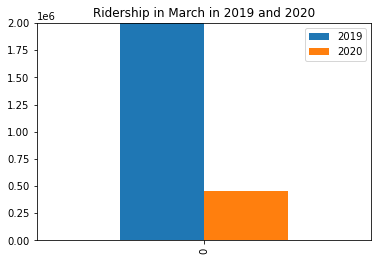

In [28]:
#the data for 2019 is much higher due to Chamber Street.
march_chart = march_ridership.plot(kind ="bar", title = "Ridership in March in 2019 and 2020")
plt.ylim(0, 2000000)

plt.savefig("Resources/Ridership at March in 2019 & 2020.png")
plt.show()

In [29]:
march_change = pd.merge(change_2019df, change_2020df, on = "STATION", how = "outer")

march_change

,TOTAL ENTRIES_x,TOTAL ENTRIES_y
STATION,,
86 ST,506902,159892
96 ST,382718,104596
ATL AV-BARCLAY,268299,37918
BROADWAY JCT,55019,18936
CHAMBERS ST,67949449,31069
E 180 ST,44292,14040
JKSN HT-ROOSVLT,317551,53313
QUEENSBORO PLZ,114158,11877
W 4 ST-WASH SQ,265487,18250


In [30]:
march_change = march_change.rename(columns = {"TOTAL ENTRIES_x": "Total Entries (2019)", "TOTAL ENTRIES_y": "Total Entries (2020)"})

march_change["Percent Change (%)"] = round((march_change["Total Entries (2020)"] - march_change["Total Entries (2019)"])/march_change["Total Entries (2019)"] * 100, 2)
march_change["Percent Change (%)"] = march_change["Percent Change (%)"].map("{:.2f}%".format)

march_change

,Total Entries (2019),Total Entries (2020),Percent Change (%)
STATION,,,
86 ST,506902,159892,-68.46%
96 ST,382718,104596,-72.67%
ATL AV-BARCLAY,268299,37918,-85.87%
BROADWAY JCT,55019,18936,-65.58%
CHAMBERS ST,67949449,31069,-99.95%
E 180 ST,44292,14040,-68.30%
JKSN HT-ROOSVLT,317551,53313,-83.21%
QUEENSBORO PLZ,114158,11877,-89.60%
W 4 ST-WASH SQ,265487,18250,-93.13%


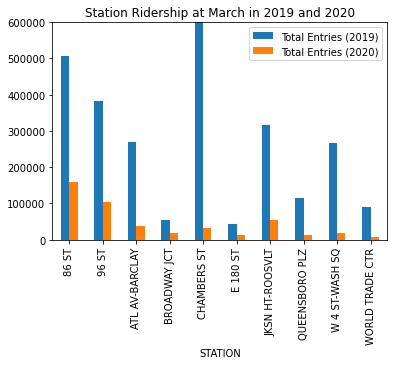

In [31]:
#the data for 2019 is much higher due to Chamber Street.
march_rider_chart = march_change.plot(kind = "bar", title = "Station Ridership at March in 2019 and 2020")
plt.ylim(0, 600000)

plt.savefig("Resources/Station Ridership at March in 2019 & 2020.png")
plt.show()

In [32]:
march_change2 = march_change.sort_values(by=["Percent Change (%)"])
#24352950 - 58450497 = -34,097,547
march_change2

,Total Entries (2019),Total Entries (2020),Percent Change (%)
STATION,,,
BROADWAY JCT,55019,18936,-65.58%
E 180 ST,44292,14040,-68.30%
86 ST,506902,159892,-68.46%
96 ST,382718,104596,-72.67%
JKSN HT-ROOSVLT,317551,53313,-83.21%
ATL AV-BARCLAY,268299,37918,-85.87%
QUEENSBORO PLZ,114158,11877,-89.60%
WORLD TRADE CTR,90873,6900,-92.41%
W 4 ST-WASH SQ,265487,18250,-93.13%


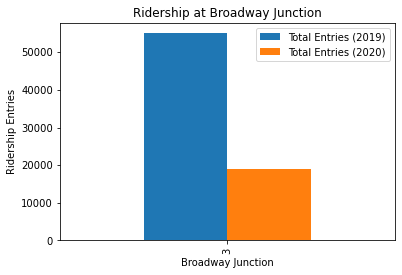

In [33]:
station_to_find = "BROADWAY JCT"
march_change = march_change.reset_index()

broadway_jct_df = march_change.loc[march_change["STATION"] == station_to_find]
station_chart = broadway_jct_df.plot(kind = "bar", title = "Ridership at Broadway Junction")

plt.xlabel("Broadway Junction")
plt.ylabel("Ridership Entries")
plt.savefig("Resources/Ridership at Broadway Junction in 2019 & 2020.png")
plt.show()

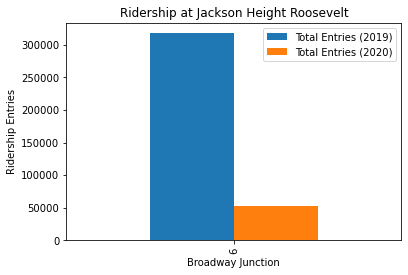

In [34]:
station_to_find = "JKSN HT-ROOSVLT"
jksn_roosvlt_df = march_change.loc[march_change["STATION"] == station_to_find]
station_chart = jksn_roosvlt_df.plot(kind = "bar", title = "Ridership at Jackson Height Roosevelt")

plt.xlabel("Broadway Junction")
plt.ylabel("Ridership Entries")
plt.savefig("Resources/Ridership at Jackson Height Roosevelt in 2019 & 2020.png")
plt.show()

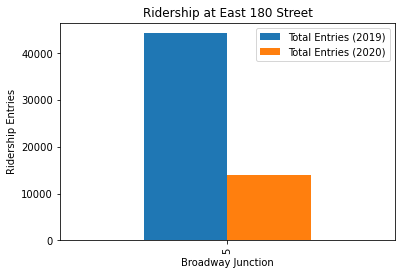

In [35]:
station_to_find = "E 180 ST"
east_180_df = march_change.loc[march_change["STATION"] == station_to_find]
station_chart = east_180_df.plot(kind = "bar", title = "Ridership at East 180 Street")

plt.xlabel("Broadway Junction")
plt.ylabel("Ridership Entries")
plt.savefig("Resources/Ridership at East 180 Street in 2019 & 2020.png")
plt.show()

In [36]:
weekday_2019_df = march_2019_df.groupby(["STATION", "LINENAME","SCP", "DATE"]).max()

weekday_2019_df

TIME     DESC     ENTRIES        EXIT
STATION   LINENAME SCP      DATE                                             
1 AV      L        00-00-00 3/23/19  8:00:00  REGULAR  14531081.0  16245913.0
                            3/24/19  8:00:00  REGULAR  14532765.0  16248724.0
                            3/25/19  8:00:00  REGULAR  14536261.0  16252676.0
                            3/26/19  8:00:00  REGULAR  14540002.0  16256564.0
                            3/27/19  8:00:00  REGULAR  14544002.0  16260463.0
...                                      ...      ...         ...         ...
ZEREGA AV 6        00-05-01 3/25/19  9:00:00  REGULAR        39.0       143.0
                            3/26/19  9:00:00  REGULAR        39.0       143.0
                            3/27/19  9:00:00  REGULAR        39.0       143.0
                            3/28/19  9:00:00  REGULAR        39.0       143.0
                            3/29/19  9:00:00  REGULAR        39.0       143.0

[33046 rows x 4 columns]